In [1]:
require(ggplot2)
require(data.table)

Loading required package: ggplot2
Loading required package: data.table


In [2]:
# If experiment parameters change, modify this function
AddParametersAsColumns <- function(df, folderName) {
    expParams <- strsplit(folderName, "_")[[1]]
    df$groupSizeDist <- expParams[10]
    df$placementDist <- expParams[11]
    df$numColocateHosts <- expParams[12]
    df$algorithm <- expParams[16]
    df$numBitmaps <- expParams[17]
    df$numLeafsPerBitmap <- expParams[18]
    df$redundancyPerBitmap <- expParams[19]
    df$numRulesPerLeaf <- expParams[20] # Shahbaz: added this new param
    return(df)
}


# Turns all files of a given filname across a set of folders into a single dataset
DatasetAsDataTable <- function(filename, folders, headers, header=FALSE) {
    # Get list of data.frames
    dfList <- lapply(folders, function(folder) {
           tmp <- read.table(paste(folder, filename, sep="/"), sep=",", header=header)
           tmp <- AddParametersAsColumns(tmp, folder)
    })
    
    # Combine into a single data.table
    dt <- data.table(do.call(rbind, dfList))
    
    # Rename columns according to headers
    for (colIndex in seq(1, length(headers))) {
        setnames(dt, colnames(dt)[colIndex], headers[colIndex])
    }
    return(dt)
}

setwd('/mnt/sdb1/baseerat/numerical-evals/logs-100K-random')
folders <- Sys.glob("logs*")
plotTheme <- theme(legend.title=element_blank(), legend.position="top", legend.text=element_text(size=6))

In [3]:
ruleCountPerLeaf <- DatasetAsDataTable("rule_count_per_leaf.csv", 
                                       folders, c("leafId", "numRules"))

In [5]:
groupCountPerTenant <- DatasetAsDataTable("group_count_per_tenant.csv", 
                                          folders, c("tenantId", "groupCount"))

In [6]:
groupSizePerGroupPerTenant <- DatasetAsDataTable("group_size_per_group_per_tenant.csv", 
                                                 folders, c("groupId", "groupSize"))

In [7]:
groupsCoveredWithBitmapsOnly <- DatasetAsDataTable("groups_covered_with_bitmaps_only.csv", 
                                                   folders, c("index", "groupsCovered", "groupsCovered_without_default_bitmap"),
                                                   TRUE) # Shahbaz: adding this param as this file contains header line

In [8]:
trafficOverhead <- DatasetAsDataTable("traffic_overhead.csv", 
                                      folders, c("index", "trafficOverhead"))

In [9]:
leafSpineTraffic <- DatasetAsDataTable("leaf_spine_traffic_per_group_per_tenant.csv", 
                                       folders, c("groupId", "multicastTraffic", "unicastTraffic", "overlayTraffic",
                                                 "baseeratTraffic"),
                                       TRUE) # Shahbaz: adding this param as this file contains header line

In [10]:
# mergedDt <- merge(leafSpineMulticast, leafSpineUnicast, 
#                   by=c('groupId', 'groupSizeDist', 'placementDist', 'numColocateHosts', 'algorithm',
#                        'numBitmaps', 'numLeafsPerBitmap', 'redundancyPerBitmap'))
# mergedDt <- merge(mergedDt, leafSpineOverlay, 
#                   by=c('groupId', 'groupSizeDist', 'placementDist', 'numColocateHosts', 'algorithm',
#                        'numBitmaps', 'numLeafsPerBitmap', 'redundancyPerBitmap'))
# mergedDt <- merge(mergedDt, leafSpineBaseerat, 
#                   by=c('groupId', 'groupSizeDist', 'placementDist', 'numColocateHosts', 'algorithm',
#                        'numBitmaps', 'numLeafsPerBitmap', 'redundancyPerBitmap'))

In [11]:
head(leafSpineTraffic)

groupId,multicastTraffic,unicastTraffic,overlayTraffic,baseeratTraffic,groupSizeDist,placementDist,numColocateHosts,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap,numRulesPerLeaf
0,121,412,238,121,uniform,colocate-random-random,12,exact-match,10,1,0,1000
1,125,428,246,125,uniform,colocate-random-random,12,exact-match,10,1,0,1000
2,109,364,214,109,uniform,colocate-random-random,12,exact-match,10,1,0,1000
3,142,496,280,142,uniform,colocate-random-random,12,exact-match,10,1,0,1000
4,45,116,86,45,uniform,colocate-random-random,12,exact-match,10,1,0,1000
5,194,704,384,194,uniform,colocate-random-random,12,exact-match,10,1,0,1000


In [12]:
vmCountPerTenant <- DatasetAsDataTable("vm_count_per_tenant.csv", folders, c("tenantId", "vmCount"))

In [13]:
head(ruleCountPerLeaf)
head(groupCountPerTenant)
head(groupSizePerGroupPerTenant)
head(vmCountPerTenant)

leafId,numRules,groupSizeDist,placementDist,numColocateHosts,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap,numRulesPerLeaf
0,1000,uniform,colocate-random-random,12,exact-match,10,1,0,1000
1,1000,uniform,colocate-random-random,12,exact-match,10,1,0,1000
2,1000,uniform,colocate-random-random,12,exact-match,10,1,0,1000
3,1000,uniform,colocate-random-random,12,exact-match,10,1,0,1000
4,1000,uniform,colocate-random-random,12,exact-match,10,1,0,1000
5,1000,uniform,colocate-random-random,12,exact-match,10,1,0,1000


tenantId,groupCount,groupSizeDist,placementDist,numColocateHosts,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap,numRulesPerLeaf
0,34,uniform,colocate-random-random,12,exact-match,10,1,0,1000
1,8,uniform,colocate-random-random,12,exact-match,10,1,0,1000
2,13,uniform,colocate-random-random,12,exact-match,10,1,0,1000
3,10,uniform,colocate-random-random,12,exact-match,10,1,0,1000
4,21,uniform,colocate-random-random,12,exact-match,10,1,0,1000
5,17,uniform,colocate-random-random,12,exact-match,10,1,0,1000


groupId,groupSize,groupSizeDist,placementDist,numColocateHosts,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap,numRulesPerLeaf
0,103,uniform,colocate-random-random,12,exact-match,10,1,0,1000
1,107,uniform,colocate-random-random,12,exact-match,10,1,0,1000
2,91,uniform,colocate-random-random,12,exact-match,10,1,0,1000
3,124,uniform,colocate-random-random,12,exact-match,10,1,0,1000
4,29,uniform,colocate-random-random,12,exact-match,10,1,0,1000
5,176,uniform,colocate-random-random,12,exact-match,10,1,0,1000


tenantId,vmCount,groupSizeDist,placementDist,numColocateHosts,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap,numRulesPerLeaf
0,186,uniform,colocate-random-random,12,exact-match,10,1,0,1000
1,47,uniform,colocate-random-random,12,exact-match,10,1,0,1000
2,74,uniform,colocate-random-random,12,exact-match,10,1,0,1000
3,55,uniform,colocate-random-random,12,exact-match,10,1,0,1000
4,119,uniform,colocate-random-random,12,exact-match,10,1,0,1000
5,97,uniform,colocate-random-random,12,exact-match,10,1,0,1000


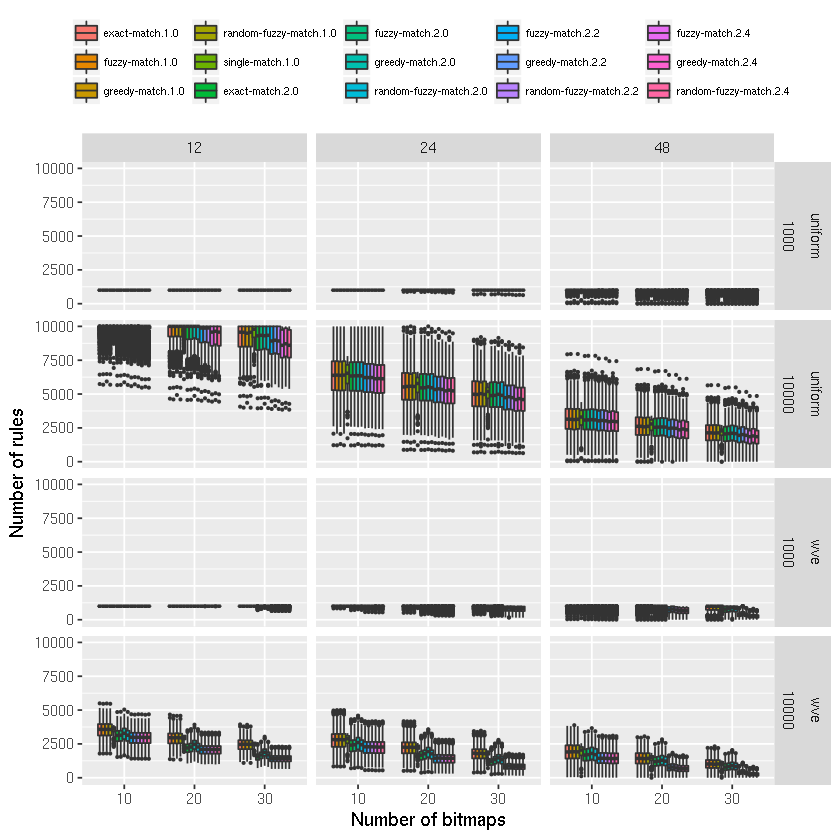

In [31]:
ggplot(ruleCountPerLeaf) +
   geom_boxplot(aes(y=numRules, x=factor(numBitmaps), 
                    fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap)),
                outlier.size=0.5) +
   facet_grid(groupSizeDist * numRulesPerLeaf ~ numColocateHosts) +
   xlab("Number of bitmaps") +
   ylab("Number of rules") +
   plotTheme

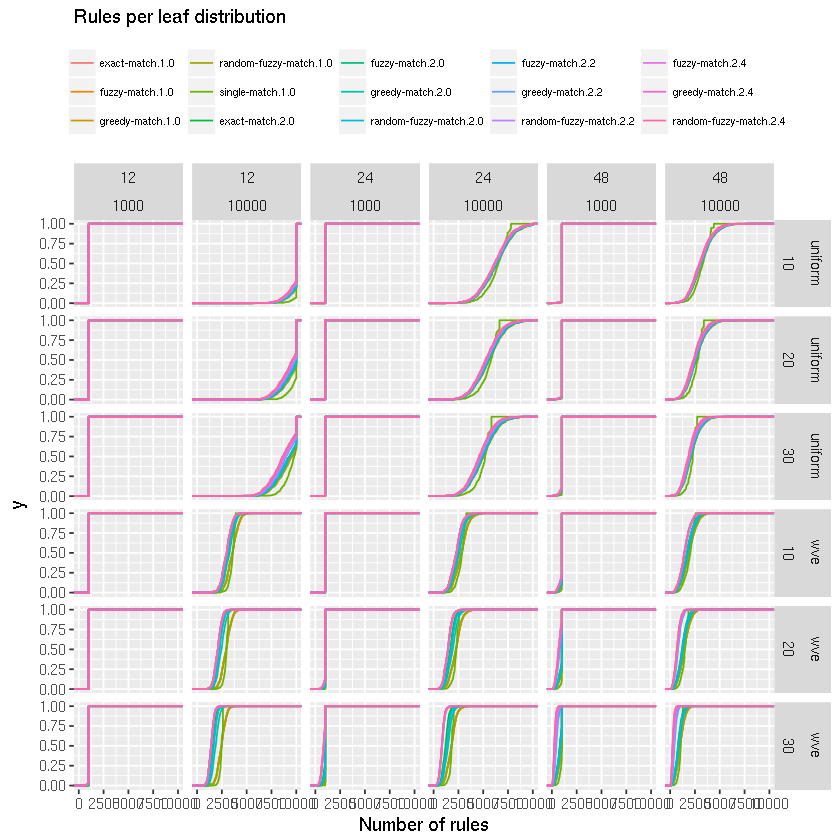

In [28]:
ggplot(ruleCountPerLeaf) +
   stat_ecdf(aes(x=numRules, col=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap))) +
   facet_grid(groupSizeDist * numBitmaps ~ numColocateHosts * numRulesPerLeaf) +
   ggtitle("Rules per leaf distribution") +
   xlab("Number of rules") +
   plotTheme

In [29]:
groupCountPerTenant[algorithm == "exact-match" & numColocateHosts == 24 & numBitmaps == 10 & numLeafsPerBitmap == 1,
                    quantile(groupCount, c(0.0, 0.5,0.99,0.999,0.9999,1.0)), by=list(groupSizeDist, numRulesPerLeaf)]

groupSizeDist,numRulesPerLeaf,V1
uniform,1000,1.0000
uniform,1000,18.0000
uniform,1000,512.2400
uniform,1000,901.0150
uniform,1000,918.4002
uniform,1000,919.0000
uniform,10000,1.0000
uniform,10000,18.0000
uniform,10000,512.2400
uniform,10000,901.0150


In [32]:
groupSizePerGroupPerTenant[algorithm == "exact-match" & numColocateHosts == 24 & numBitmaps == 10 & numLeafsPerBitmap == 1,
                           quantile(groupSize,c(0.0, 0.5,0.99,0.999,0.9999,1.0)), by=list(groupSizeDist, numRulesPerLeaf)]

groupSizeDist,numRulesPerLeaf,V1
uniform,1000,5.000
uniform,1000,143.000
uniform,1000,4258.000
uniform,1000,4837.467
uniform,1000,4976.149
uniform,1000,4997.000
uniform,10000,5.000
uniform,10000,143.000
uniform,10000,4258.000
uniform,10000,4837.467


In [34]:
vmCountPerTenant[algorithm == "exact-match" & groupSizeDist == "wve" & 
                 numColocateHosts == 24 & numBitmaps == 10 & numLeafsPerBitmap == 1,
                 quantile(vmCount,c(0.0, 0.5,0.99,0.999,0.9999,1.0))]

0%      50%      99%    99.9%   99.99%     100% 
  10.000   98.000 2785.330 4902.078 4999.000 4999.000

In [41]:
# Shahbaz: need to replot; forgot checking one thing while generating logs.

# ggplot(groupsCoveredWithBitmapsOnly) +
#    geom_bar(aes(y=groupsCovered_without_default_bitmap, x=factor(numBitmaps), 
#                 fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap)),
#             stat="identity",position=position_dodge()) +
#    facet_grid(groupSizeDist * numRulesPerLeaf ~ numColocateHosts) +
#    xlab("Number of bitmaps") +
#    ylab("Groups covered (without default bitmap)") +
#    plotTheme

In [42]:
# ggplot(groupsCoveredWithBitmapsOnly) +
#    geom_bar(aes(y=groupsCovered, x=factor(numBitmaps), 
#                 fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap)),
#             stat="identity",position=position_dodge()) +
#    facet_grid(groupSizeDist * numRulesPerLeaf ~ numColocateHosts) +
#    xlab("Number of bitmaps") +
#    ylab("Groups covered") +
#    plotTheme

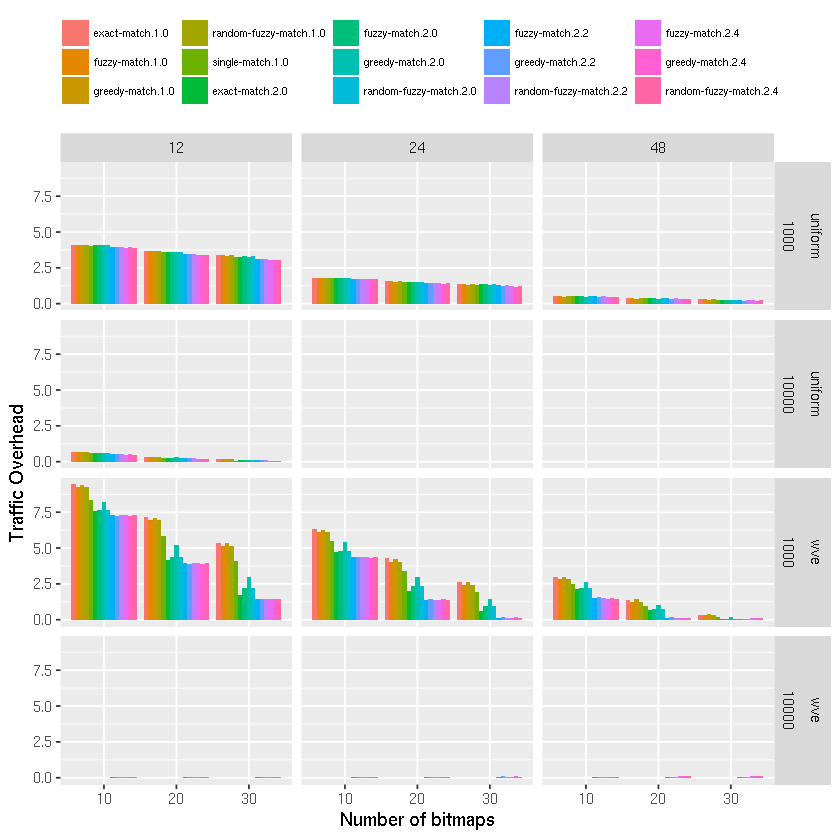

In [43]:
ggplot(trafficOverhead) +
   geom_bar(aes(y=trafficOverhead, x=factor(numBitmaps), 
                fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap)),
            stat="identity",position=position_dodge()) +
   facet_grid(groupSizeDist * numRulesPerLeaf ~ numColocateHosts) +
   xlab("Number of bitmaps") +
   ylab("Traffic Overhead") +
   plotTheme

In [37]:
overheads <- mergedDt[, list("UnicastSum" = sum(as.numeric(unicastTraffic)), 
                             "MulticastSum" = sum(as.numeric(multicastTraffic)),
                             "BaseeratSum" = sum(as.numeric(baseeratTraffic)),
                             "OverlaySum" = sum(as.numeric(overlayTraffic))),
         by=list(groupSizeDist, placementDist, numColocateHosts, algorithm,
                 numBitmaps, numLeafsPerBitmap, redundancyPerBitmap)]

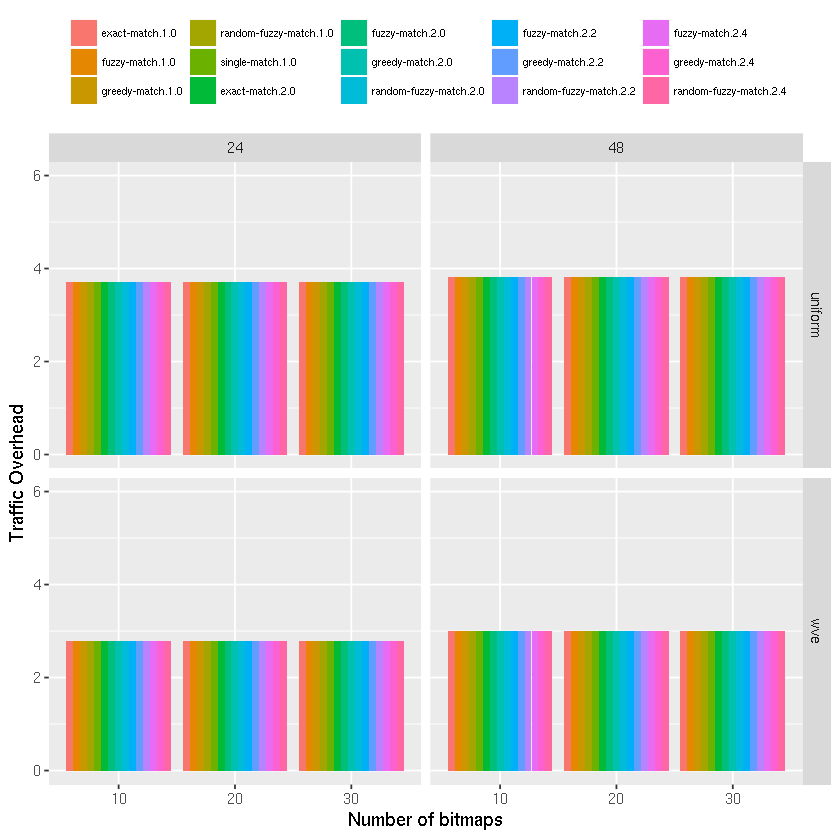

In [131]:
ggplot(overheads) +
   geom_bar(aes(y=UnicastSum/MulticastSum, x=factor(numBitmaps), 
                fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap)),
            stat="identity", position=position_dodge(),) +
   facet_grid(groupSizeDist ~ numColocateHosts) +
   ylim(c(0, 6)) +
   xlab("Number of bitmaps") +
   ylab("Traffic Overhead") +
   plotTheme

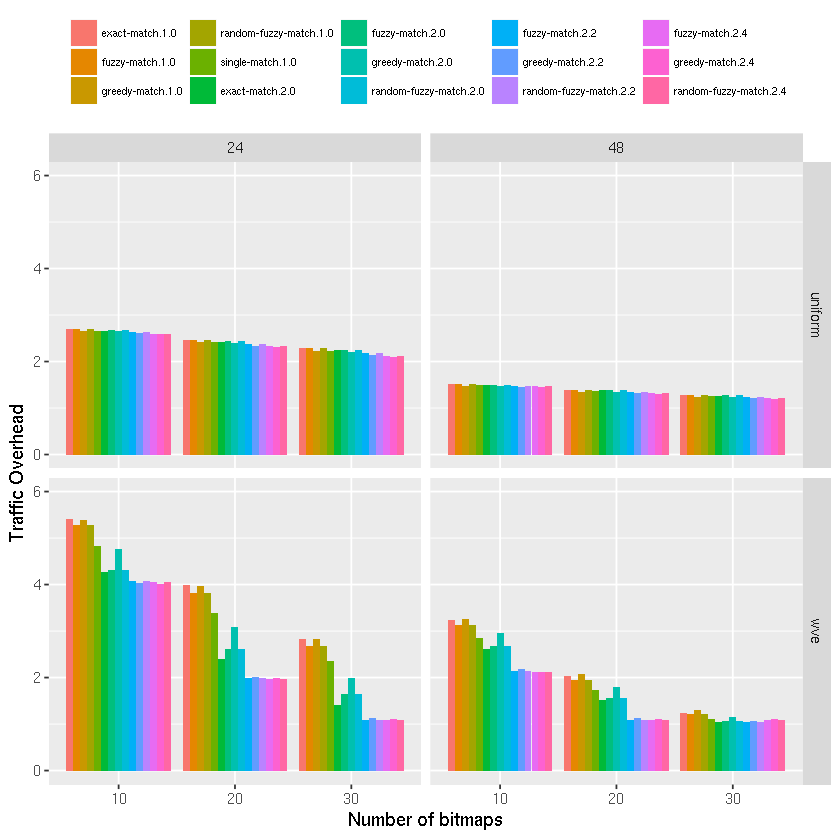

In [132]:
ggplot(overheads) +
   geom_bar(aes(y=BaseeratSum/MulticastSum, x=factor(numBitmaps), 
                fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap)),
            stat="identity", position=position_dodge(),) +
   facet_grid(groupSizeDist ~ numColocateHosts) +
   ylim(c(0, 6)) +
   xlab("Number of bitmaps") +
   ylab("Traffic Overhead") +
   plotTheme

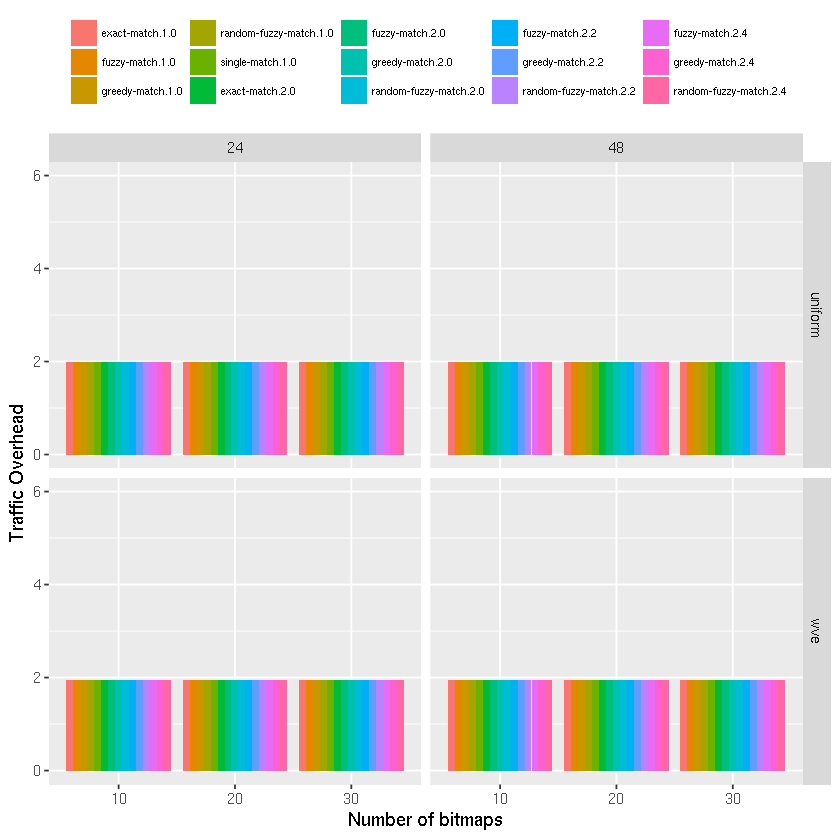

In [134]:
ggplot(overheads) +
   geom_bar(aes(y=OverlaySum/MulticastSum, x=factor(numBitmaps), 
                fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap)),
            stat="identity", position=position_dodge(),) +
   facet_grid(groupSizeDist ~ numColocateHosts) +
   ylim(c(0, 6)) +
   xlab("Number of bitmaps") +
   ylab("Traffic Overhead") +
   plotTheme